<a href="https://colab.research.google.com/github/Roaa27/gtc-ml-project1-hotel-bookings-1/blob/main/gtc_ml_project1_hotel_bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# gtc-ml-project1-hotel-bookings

### Phase 1: Load Data
We uploaded the dataset (`hotel_bookings.csv`) into Colab.

In [2]:
# 1. Upload the CSV file from your computer to Colab
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


We loaded the data into a Pandas DataFrame for exploration.

In [3]:
# 2. Load the dataset into a Pandas DataFrame
import pandas as pd
df = pd.read_csv('hotel_bookings.csv')

### Phase 2: Exploratory Data Analysis (EDA)
We explored the dataset:
- Shape → number of rows & columns
- Info → column types & null values
- Describe → summary statistics
- Head → preview of the first 5 rows



In [4]:
# 3. Data exploration
print(df.shape)          # Dataset dimensions (rows x columns)
print(df.info())         # Column types and missing values
print(df.describe())     # Summary statistics for numerical columns
print(df.head())         # First 5 rows

(119390, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  mea

- Visualizations:
- Missing values (Missingno).
- Distribution of adr.
- Correlation heatmap (numeric columns).

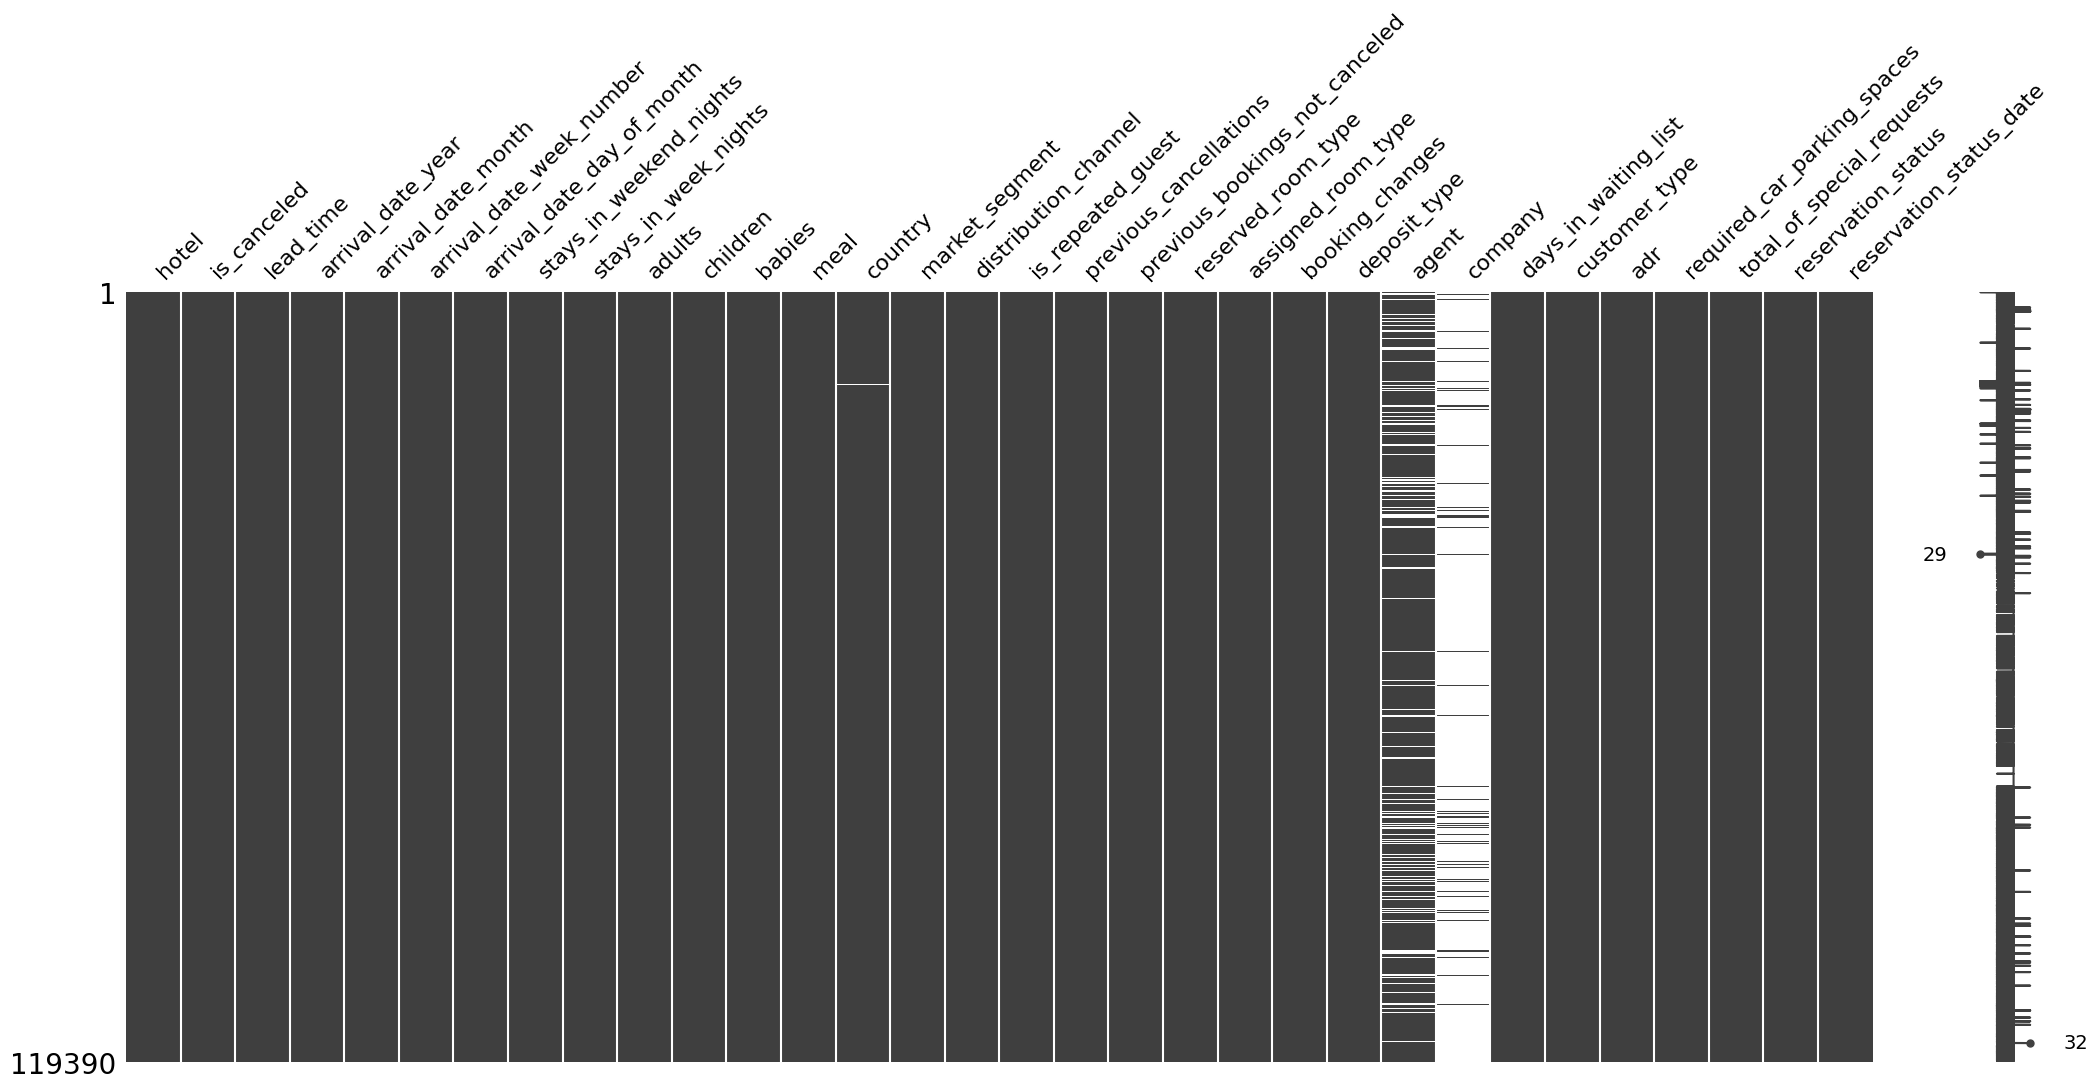

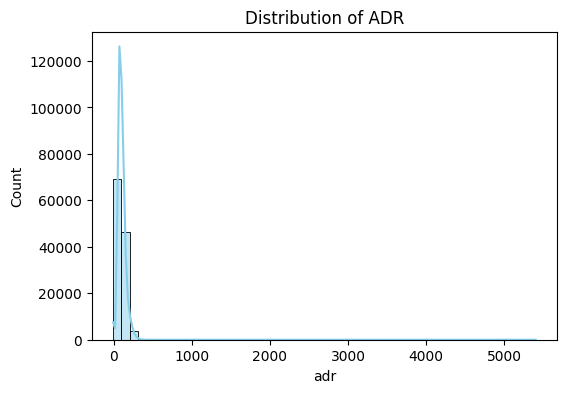

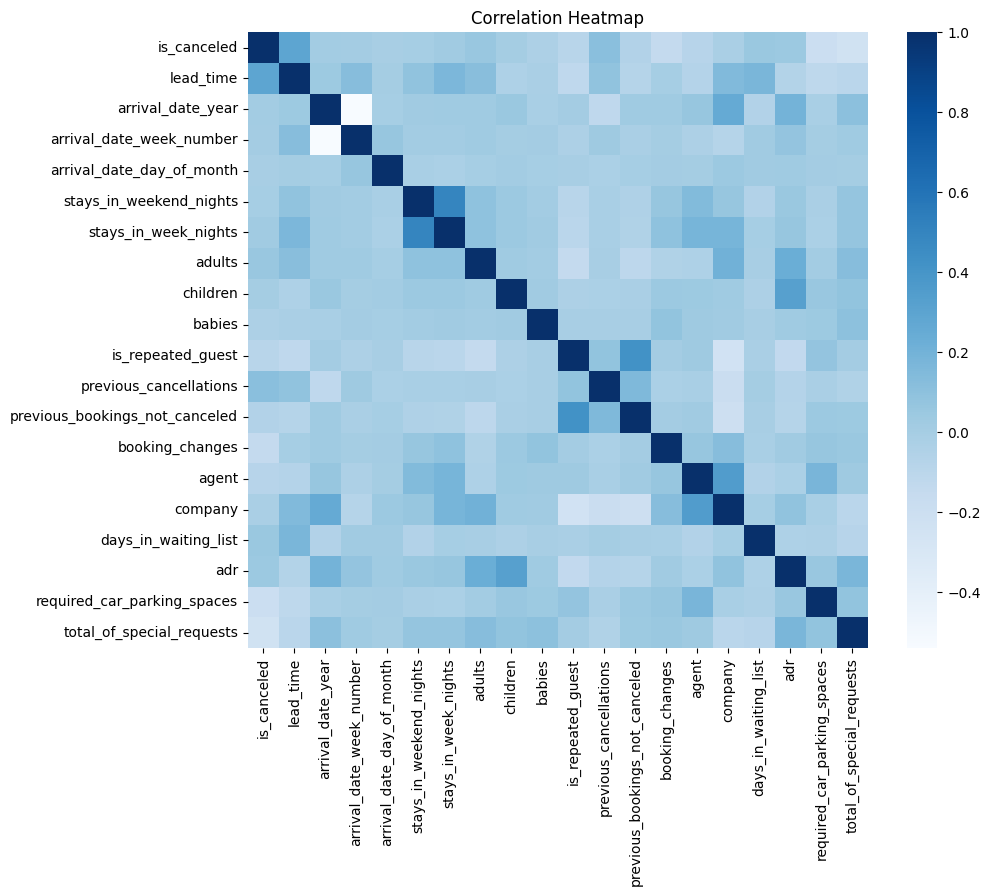

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Missing values visualization
msno.matrix(df)
plt.show()

# Distribution of ADR
plt.figure(figsize=(6,4))
sns.histplot(df['adr'], kde=True, bins=50, color="skyblue")
plt.title("Distribution of ADR")
plt.show()

# Correlation heatmap (numeric only)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap="Blues", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [6]:
print(df.columns.tolist())

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


### Phase 3: Handle Missing Values
We fixed missing values by:
- Replacing agent & company with 0
- country → replaced NaN with mode (most frequent value).
- Filling children with the median
- Filling customer_type with the mode
- Replacing adr missing values with the median
- Replacing parking & special requests with 0



In [7]:
# ---- Fill missing values ----
# agent and company → replace NaN with 0
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

# country → replace NaN with mode (better than Unknown for ML)
df['country'] = df['country'].fillna(df['country'].mode()[0])

# children → replace NaN with median
df['children'] = df['children'].fillna(df['children'].median())

# customer_type → replace NaN with mode
df['customer_type'] = df['customer_type'].fillna(df['customer_type'].mode()[0])

# adr → replace NaN with median
df['adr'] = df['adr'].fillna(df['adr'].median())

# required_car_parking_spaces → replace NaN with 0
df['required_car_parking_spaces'] = df['required_car_parking_spaces'].fillna(0)

# total_of_special_requests → replace NaN with 0
df['total_of_special_requests'] = df['total_of_special_requests'].fillna(0)

# Check again
print("Missing values left:\n", df.isna().sum())

Missing values left:
 hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr   

### Phase 4: Outlier Handling
Detected outliers in adr using a boxplot.

Capped extreme values (set all adr > 1000 = 1000).

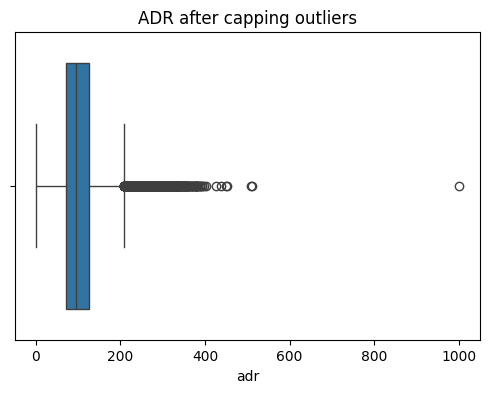

In [8]:
# Cap extreme values in ADR
df.loc[df['adr'] > 1000, 'adr'] = 1000

plt.figure(figsize=(6,4))
sns.boxplot(x=df[df['adr'] > 0]['adr'])
plt.title("ADR after capping outliers")
plt.show()


### Phase 5: Remove Duplicates
Dropped exact duplicate rows from the dataset.

In [9]:
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (87377, 32)


### Phase 6: Fix Data Types
Converted reservation_status_date into a datetime object.

In [10]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

### Phase 7: Feature Engineering
Created new features:
- total_guests
- total_nights
- is_family

In [11]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['is_family'] = df.apply(lambda x: 1 if (x['children'] > 0 or x['babies'] > 0) else 0, axis=1)

### Phase 8: Encoding
- Used One-Hot Encoding for categorical columns with few categories.  
- Used Frequency Encoding for country (since it has many unique values).

In [12]:
# One-Hot Encoding for low-cardinality categorical columns
low_cardinality_cols = ['meal', 'market_segment', 'distribution_channel']
df = pd.get_dummies(df, columns=low_cardinality_cols, drop_first=True)

# Frequency Encoding for high-cardinality column "country"
country_freq = df['country'].value_counts(normalize=True)
df['country_encoded'] = df['country'].map(country_freq)
df = df.drop('country', axis=1)

### Phase 9: Drop Leakage Columns
Dropped reservation_status and reservation_status_date to avoid data leakage.

In [13]:
df = df.drop(['reservation_status', 'reservation_status_date'], axis=1)

Check again

In [14]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


### Phase 10: Train/Test Split
Split the dataset:
- Training set: 80%
- Testing set: 20%

In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (69901, 45)
Test shape: (17476, 45)


 Save the cleaned DataFrame into a CSV file and Download the CSV file to your computer

In [17]:
# 1. Save the cleaned DataFrame into a CSV file
df.to_csv("hotel_bookings_new.csv", index=False)

# 2. Download the CSV file to your computer
from google.colab import files
files.download("hotel_bookings_new.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ✅ Final Note
The dataset is now cleaned, preprocessed, and ready for machine learning.